In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (silhouette_score,
                             accuracy_score,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay
                             )

In [3]:
data = pd.read_csv("bank_transactions.csv")

In [4]:
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [6]:
data.columns.tolist()


['TransactionID',
 'CustomerID',
 'CustomerDOB',
 'CustGender',
 'CustLocation',
 'CustAccountBalance',
 'TransactionDate',
 'TransactionTime',
 'TransactionAmount (INR)']

In [7]:
data.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [8]:
data['CustLocation'].unique().tolist()

['JAMSHEDPUR',
 'JHAJJAR',
 'MUMBAI',
 'NAVI MUMBAI',
 'ITANAGAR',
 'GURGAON',
 'MOHALI',
 'GUNTUR',
 'AHMEDABAD',
 'THANE',
 'PUNE',
 'NEW DELHI',
 'NO 3 KALYANI NAGAR PUNE',
 'SECUNDERABAD',
 'WAYS PANCHKUVA AHMEDABAD',
 'LUCKNOW',
 'DELHI',
 'CHENNAI',
 'GRAM PANCHAYTH HYDERABAD',
 'GHAZIABAD',
 'BANGALORE',
 'GUWAHATI',
 'DHANBAD',
 'MUKTSAR',
 'SOCORRO',
 'ANDHERI (EAST) MUMBAI',
 'AURANGABAD',
 'KOTA',
 'JAIPUR',
 'K V RANGAREDDY',
 'MUZAFFARNAGAR',
 'BURDWAN',
 'LUDHIANA',
 'NOIDA',
 'AGRA',
 'SHAHJAHANPUR',
 'DIST RAIGAD PANVEL',
 'DEHRADUN',
 'HYDERABAD',
 'GODDA',
 'REWARI (HARYANA)',
 'NELLORE',
 'ADIPUR',
 'DUBAI',
 'ALLAHABAD',
 'BATHINDA',
 'NASHIK',
 'JAMMU',
 'JABALPUR',
 'KASHIPUR',
 'ETAH',
 'KOLKATA',
 'VADODARA',
 'TIRUPUR',
 'SURAT',
 'NAGO THANE',
 'KARUR DT',
 'CHITTO0R',
 'INDORE',
 'OFF CUBBON ROAD BANGALORE',
 'PIMPALI',
 'PUMP HINJEWADI PUNE',
 'KANJURMARG EAST',
 'SOUTH 24 PARGANAS',
 'MIRABHAYANDER THANE MIRA ROAD',
 'SAHARANPUR',
 'CHANDIGARH',
 'COMPLEX G

In [9]:
# df = ['TransactionID', 'CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance']
# data.drop(df,inplace=True)

In [10]:
# data

In [11]:
col = ['CustomerID', 'TransactionTime', 'TransactionDate', 'TransactionAmount (INR)']
RFM = data[col]
RFM

,CustomerID,TransactionTime,TransactionDate,TransactionAmount (INR)
0,C5841053,143207,2/8/16,25.0
1,C2142763,141858,2/8/16,27999.0
2,C4417068,142712,2/8/16,459.0
3,C5342380,142714,2/8/16,2060.0
4,C9031234,181156,2/8/16,1762.5
...,...,...,...,...
1048562,C8020229,184824,18/9/16,799.0
1048563,C6459278,183734,18/9/16,460.0
1048564,C6412354,183313,18/9/16,770.0
1048565,C6420483,184706,18/9/16,1000.0


In [12]:
RFM['TransactionDate'] = pd.to_datetime(RFM['TransactionDate'], errors='coerce')

C:\Users\Admin\AppData\Local\Temp\ipykernel_12376\206017116.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  RFM['TransactionDate'] = pd.to_datetime(RFM['TransactionDate'], errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12376\206017116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['TransactionDate'] = pd.to_datetime(RFM['TransactionDate'], errors='coerce')


In [13]:
RFM

,CustomerID,TransactionTime,TransactionDate,TransactionAmount (INR)
0,C5841053,143207,2016-02-08,25.0
1,C2142763,141858,2016-02-08,27999.0
2,C4417068,142712,2016-02-08,459.0
3,C5342380,142714,2016-02-08,2060.0
4,C9031234,181156,2016-02-08,1762.5
...,...,...,...,...
1048562,C8020229,184824,2016-09-18,799.0
1048563,C6459278,183734,2016-09-18,460.0
1048564,C6412354,183313,2016-09-18,770.0
1048565,C6420483,184706,2016-09-18,1000.0


In [14]:
print(RFM['TransactionDate'].max())
print(RFM['TransactionDate'].min())

2016-12-09 00:00:00
2016-01-08 00:00:00


In [15]:
import datetime as dt

RFM['TransactionDate'] = pd.to_datetime(RFM['TransactionDate'])

now = dt.datetime(2016, 12, 9)
rfm_data = RFM.groupby('CustomerID').agg(
    Recency=('TransactionDate', lambda x: (now - x.max()).days),
    Frequency=('TransactionTime', 'count'),
    MonetaryValue=('TransactionAmount (INR)', 'sum')
)


C:\Users\Admin\AppData\Local\Temp\ipykernel_12376\538943354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['TransactionDate'] = pd.to_datetime(RFM['TransactionDate'])


In [16]:
rfm_data

,Recency,Frequency,MonetaryValue
CustomerID,,,
C1010011,74,2,5106.0
C1010012,117,1,1499.0
C1010014,154,2,1455.0
C1010018,85,1,30.0
C1010024,113,1,5000.0
...,...,...,...
C9099836,154,1,691.0
C9099877,85,1,222.0
C9099919,113,1,126.0


In [17]:
# rfm_data['Recency_score'] = pd.qcut(rfm_data['Recency'], 3, labels=[3, 2, 1,0]) 
# def Frequency_score(x):
#     if x == 1:
#         return 1
#     elif x == 2:
#         return 2
#     elif x == 3:
#         return 3
#     else:
#         return 0

# rfm_data['Frequency_score'] = rfm_data['Frequency'].apply(Frequency_score)
# rfm_data['MonetaryValue_score'] = pd.qcut(rfm_data['MonetaryValue'], 5, labels=[1, 2, 3, 4, 5]) 
# rfm_data['RFM_SCORE'] = (rfm_data['Recency_score'].astype(str) + rfm_data['Frequency_score'].astype(str) + rfm_data['MonetaryValue_score'].astype(str))
# rfm_data['RF_SCORE'] = (rfm_data['Recency_score'].astype(str) + rfm_data['Frequency_score'].astype(str))
# rfm_data['FirstTransactionDate'] = df.groupby('CustomerID').agg({'TransactionDate': lambda x: x.max()})
# rfm_data['LastTransactionDate'] = df.groupby('CustomerID').agg({'TransactionDate': lambda x: x.min()})
# rfm_data

In [18]:
# r = pd.qcut(rfm_data.Recency, 4, labels = list(range(0,4)))
# f = pd.qcut(rfm_data.Frequency, 4, labels=list(range(0,4)))
# m = pd.qcut(rfm_data.MonetaryValue, 4, labels = list(range(0,4)))
# rfm_data_cutted = pd.DataFrame({'Recency' : r, 'Frequency' : f, 'MonetaryValue' : m})
# rfm_data_cutted

In [19]:
group = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm_data)
    group.append([i, kmeans.inertia_])
groups = pd.DataFrame(group, columns = ['number_of_group', 'inertia'])
groups

,number_of_group,inertia
0,1,4.593776e+13
1,2,2.422077e+13
2,3,1.635468e+13
3,4,9.498786e+12
4,5,7.418639e+12
5,6,5.481264e+12
6,7,3.832455e+12
7,8,2.670448e+12
8,9,2.159137e+12
9,10,1.771211e+12


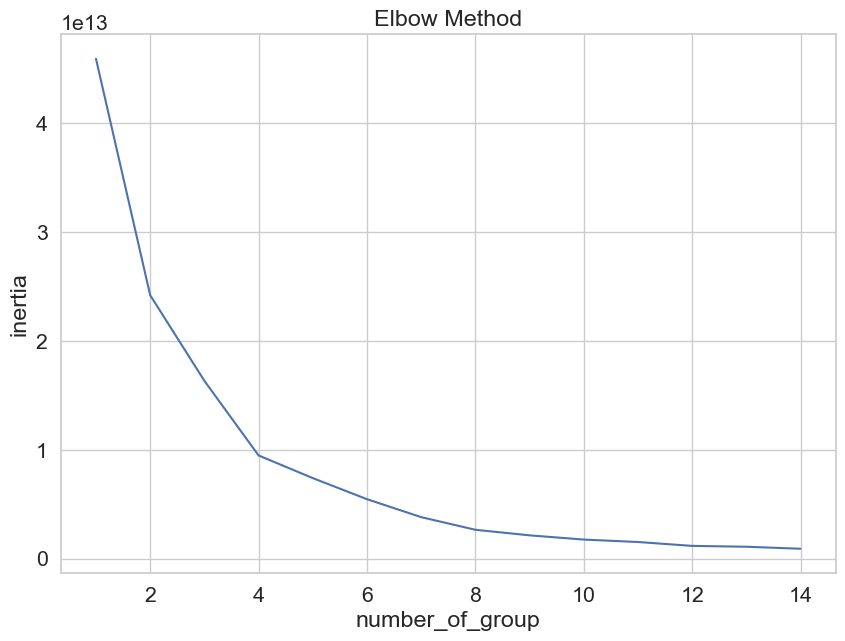

In [20]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4, style="whitegrid")
sns.lineplot(data = groups, x = 'number_of_group', y = 'inertia').set(title = "Elbow Method")
plt.show()

In [21]:
def plots_model():
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    grouped_data = rfm_data.groupby('groups')
  
    for i, (group_name, group_data) in enumerate(grouped_data):
        xs = group_data['Recency']
        ys = group_data['MonetaryValue']
        zs = group_data['Frequency']
        ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', label=group_name)

    ax.set_xlabel('Recency')
    ax.set_zlabel('Frequency')
    ax.set_ylabel('MonetaryValue')
    plt.title('Visualization of created groups')
    plt.legend()
    plt.show()

In [22]:
model_1 = KMeans(n_clusters=4, init='k-means++', max_iter=300)
groups = model_1.fit_predict(rfm_data)
rfm_data['groups'] = groups

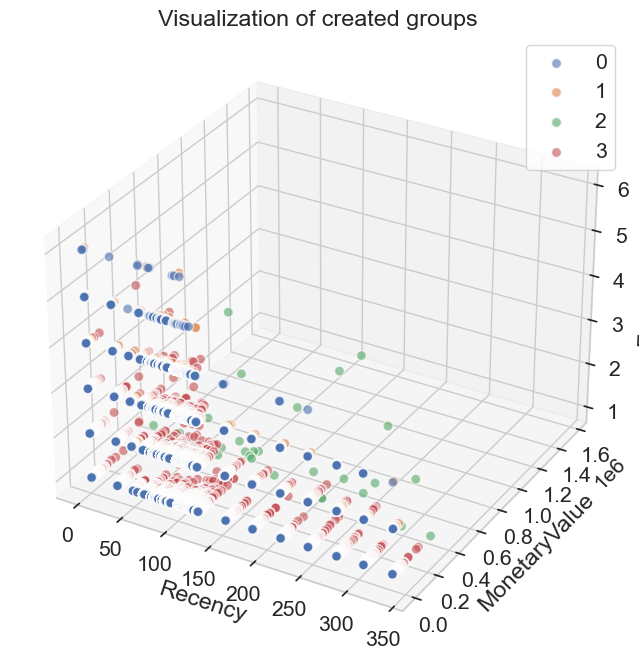

In [23]:
plots_model()

In [24]:
rfm_data.agg(['mean'])

,Recency,Frequency,MonetaryValue,groups
mean,128.747135,1.185806,1866.856351,0.024406


In [25]:
rfm_data.groupby('groups').agg(['mean'])

,Recency,Frequency,MonetaryValue
,mean,mean,mean
groups,,,
0,128.896311,1.181460,1210.244425
1,121.694866,1.395696,25146.440658
2,138.909091,1.272727,564041.798788
3,120.261714,1.384571,99909.257051


<Axes: title={'center': 'The sum of the values of individual groups'}, xlabel='groups'>

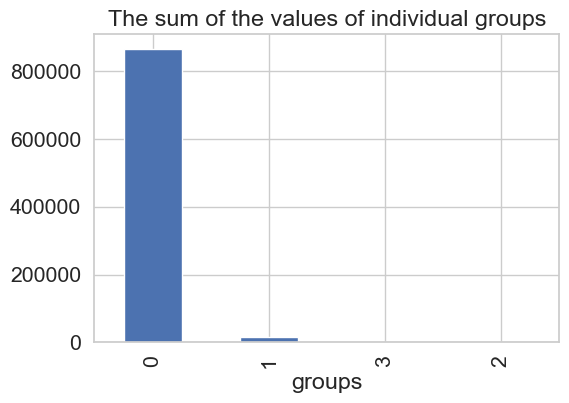

In [26]:
rfm_data.groups.value_counts().plot(kind='bar', figsize=(6,4), title='The sum of the values of individual groups')

In [27]:
def name(row):
    segment_mapping = {0: 'departing', 1: 'active', 2: 'inactive'}
    return segment_mapping.get(row, 'new')

rfm_data['SegmentName'] = rfm_data['groups'].apply(name)
rfm_data

,Recency,Frequency,MonetaryValue,groups,SegmentName
CustomerID,,,,,
C1010011,74,2,5106.0,0,departing
C1010012,117,1,1499.0,0,departing
C1010014,154,2,1455.0,0,departing
C1010018,85,1,30.0,0,departing
C1010024,113,1,5000.0,0,departing
...,...,...,...,...,...
C9099836,154,1,691.0,0,departing
C9099877,85,1,222.0,0,departing
C9099919,113,1,126.0,0,departing


In [28]:
rfm_data['groups'].value_counts()

groups
0    866217
1     16265
3      1750
2        33
Name: count, dtype: int64

* Cluster 0
* Cluster 1
* Cluster 2
* Cluster 3

In [29]:
x = rfm_data[['Recency','Frequency','MonetaryValue']]
y = rfm_data["groups"]

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42)
rf.fit(x_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [32]:
y_pred = rf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(176853,), dtype=int32)

In [33]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    173357
           1       1.00      1.00      1.00      3160
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00       328

    accuracy                           1.00    176853
   macro avg       1.00      1.00      1.00    176853
weighted avg       1.00      1.00      1.00    176853



In [34]:
accuracy_score(y_test, y_pred)

0.999988691172895

# there is something conflict there accuracy score is way to much high